<a href="https://colab.research.google.com/github/Soham-Chaudhuri/machine-learning/blob/main/CO2_Emission_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Labraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Read Data

In [ ]:
fuel = pd.read_csv("Fuel.csv")
fuel.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
fuel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


# 4. Exploratory Data Analysis

In [ ]:
# 4.1 Data Dimension
fuel.shape

(1067, 13)

In [ ]:
# 4.2 DATA TYPES
fuel.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [ ]:
# 4.3 MISSING VALUES
missing_value = pd.DataFrame({
    'Missing Value' : fuel.isnull().sum(),
    'Percentage' : (fuel.isnull().sum() / len(fuel)) * 100
})
missing_value

,Missing Value,Percentage
MODELYEAR,0,0.0
MAKE,0,0.0
MODEL,0,0.0
VEHICLECLASS,0,0.0
ENGINESIZE,0,0.0
CYLINDERS,0,0.0
TRANSMISSION,0,0.0
FUELTYPE,0,0.0
FUELCONSUMPTION_CITY,0,0.0
FUELCONSUMPTION_HWY,0,0.0


We can see, our dataset does not contain any Missing Values

In [ ]:
# 4.4 Duplicate Data
duplicate = fuel.duplicated().sum()
print('There are ',duplicate,' duplicated roes in the dataset')

There are  0  duplicated roes in the dataset


In [ ]:
fuel.drop_duplicates(inplace = True)
fuel.reset_index(inplace = True, drop = True)

We use the drop parameter to avoid the old index being added as a column

In [ ]:
# 4.5 STATISTICS
fuel.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


1. The average amount of CO2 emitted from cars is 256 g/km
2. Atleast 4.5 Litres of fuel is consumed be it the car is on 3. city roads or highway
4. About 75% of the cars have 8 or less cylinders
5. The amount of fuel consumed by cars on city roads is comparitvely greater than that of highway

In [ ]:
# Including only string columns in a DataFrame description.
fuel.describe(include = object)

,MAKE,MODEL,VEHICLECLASS,TRANSMISSION,FUELTYPE
count,1067,1067,1067,1067,1067
unique,39,663,16,22,4
top,FORD,F150 FFV,MID-SIZE,A6,X
freq,90,8,178,222,514


1. there are total 39 different car companies with 663 different model
2. Vehicals are divided into 16 classes with MID-SIZE vehicles frequenting the most
3. Fuel X is seems to be mostly used
4. Most Cars have A6 transmission

# 4.5 Analyse Categorical Variable

In [ ]:
fuel_feature = fuel.select_dtypes(include = 'object')
fuel_feature1 = fuel_feature[['VEHICLECLASS', 'TRANSMISSION','FUELTYPE','MAKE']]
fuel_feature.head()
fuel_feature1.head()

,VEHICLECLASS,TRANSMISSION,FUELTYPE,MAKE
0,COMPACT,AS5,Z,ACURA
1,COMPACT,M6,Z,ACURA
2,COMPACT,AV7,Z,ACURA
3,SUV - SMALL,AS6,Z,ACURA
4,SUV - SMALL,AS6,Z,ACURA


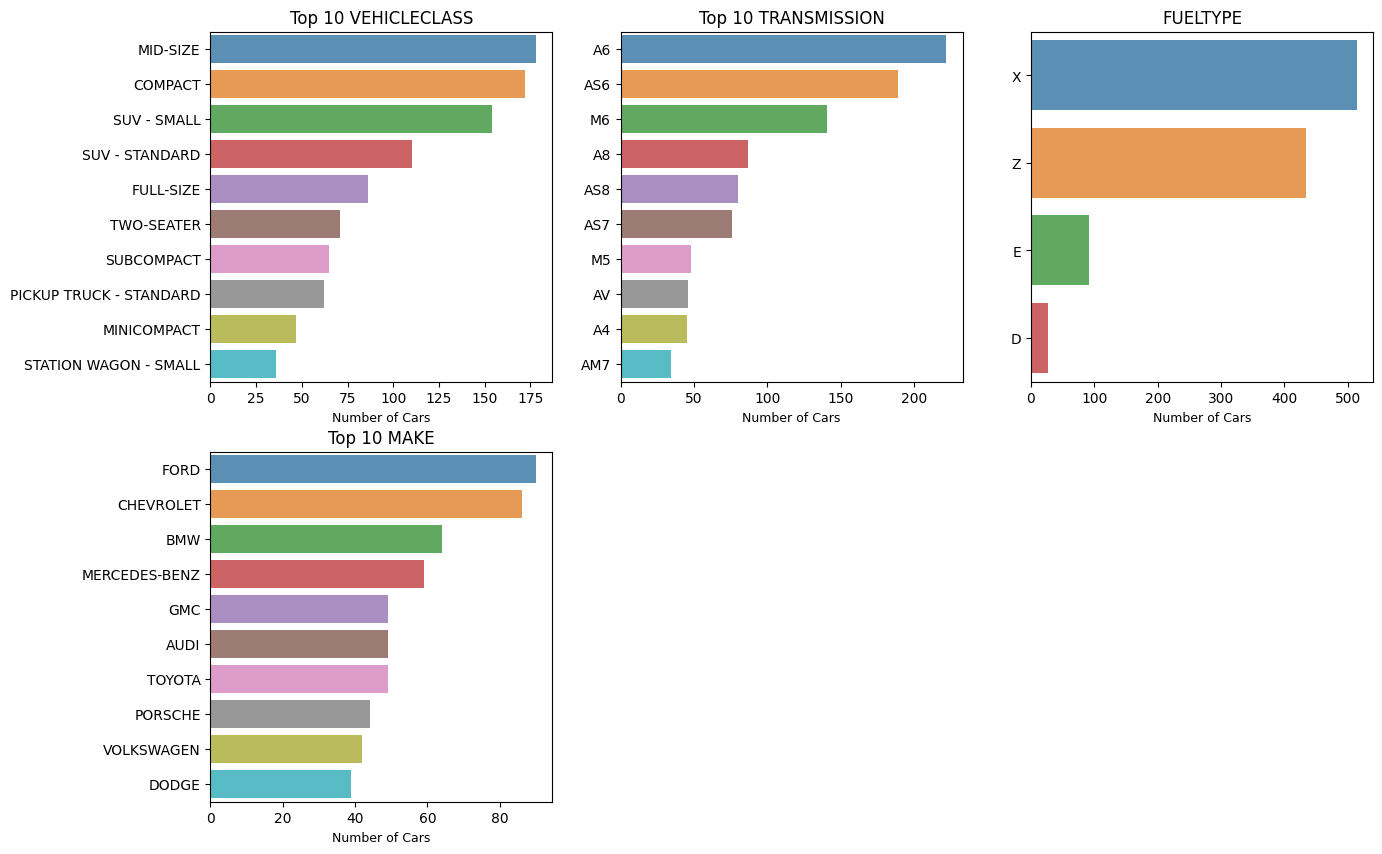

In [ ]:
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(15, 10))
for variable, subplot in zip(fuel_feature1.columns,ax.flatten()):
    cat_count  = fuel[variable].value_counts()
    cat_count10 = cat_count[:10]
    z = sns.barplot(x=cat_count10.values,y=cat_count10.index, alpha=0.8, ax=subplot)
    if cat_count.size > 10:
        z.set_title('Top 10 {}'.format(variable))
    else:
        z.set_title(variable)
    z.set_xlabel('Number of Cars', fontsize=9)

fig.delaxes(ax[1][1])
fig.delaxes(ax[1][2])

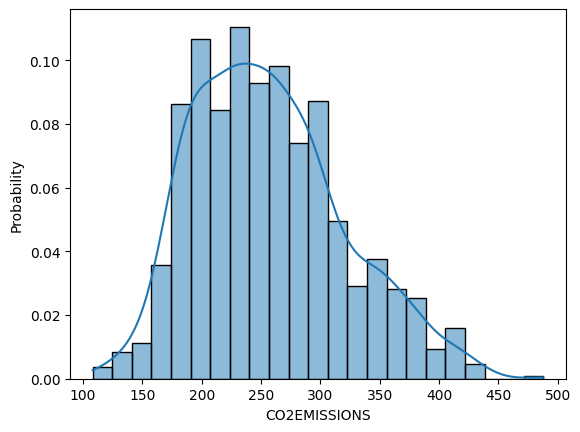

In [ ]:
sns.histplot(fuel['CO2EMISSIONS'],stat = "probability", kde = True)
plt.show()

# Analyse Relationship between Target and Independent Variables

<Figure size 1000x500 with 0 Axes>

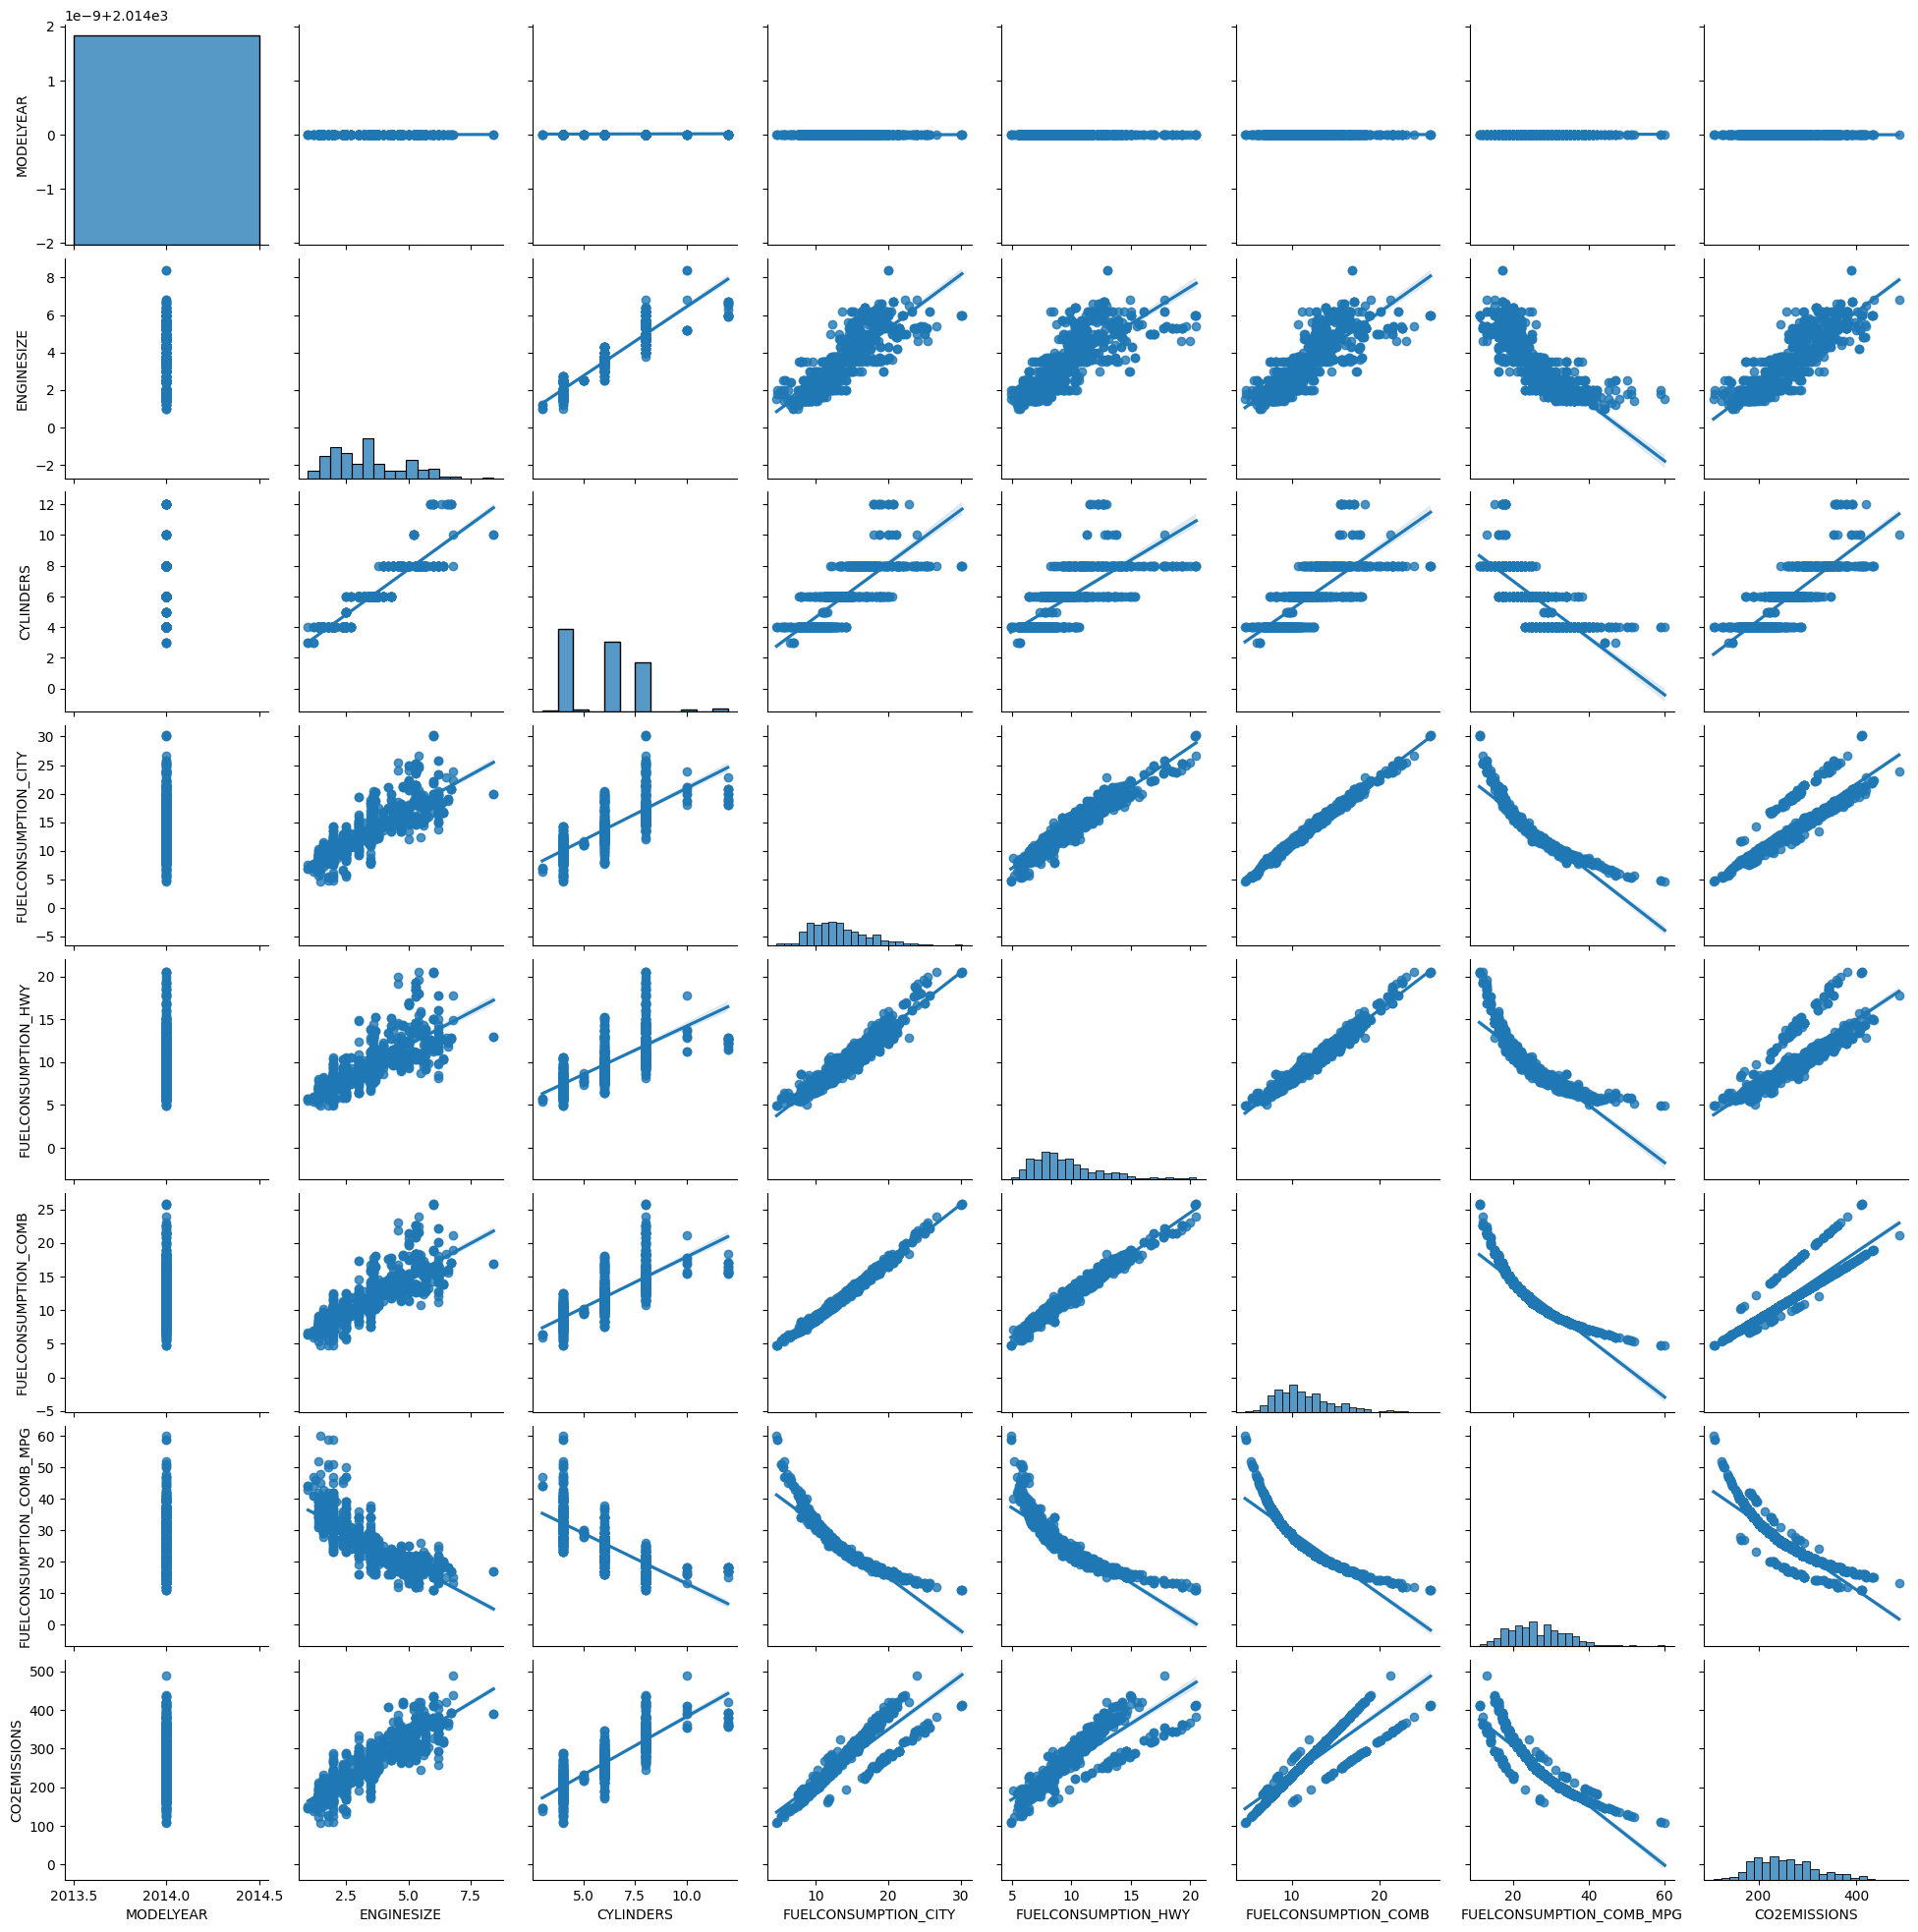

In [ ]:
plt.figure(figsize=(10,5))
sns.pairplot(fuel,kind="reg")
plt.show()

# 5. Date Preprocessing

In [ ]:
fuel.drop('MODEL', axis = 1, inplace = True)
fuel.head()
# as model number has no significance with co2 emission

,MODELYEAR,MAKE,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
# Categorical Data to Numeric
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# categor = ["MAKE", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE"]
# one_hot = OneHotEncoder()
# transformer = ColumnTransformer([("one_hot", one_hot, categor)],
#                                remainder = "passthrough")
# transformed_x = transformer.fit_transform(x)
# transformed_x
df_dummies = pd.get_dummies(data = fuel[["MAKE", "VEHICLECLASS", "TRANSMISSION", "FUELTYPE"]], drop_first = True)

df_num_features=fuel.select_dtypes(include=np.number)

df_comb = pd.concat([df_num_features, df_dummies], axis = 1)

df_comb.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,2.0,4,9.9,6.7,8.5,33,196,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2014,2.4,4,11.2,7.7,9.6,29,221,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2014,1.5,4,6.0,5.8,5.9,48,136,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2014,3.5,6,12.7,9.1,11.1,25,255,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,3.5,6,12.1,8.7,10.6,27,244,0,0,...,0,0,0,0,0,0,0,0,0,1


# 6. Deploying Model

In [ ]:
# using scikit_learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
np.random.seed(42)
x = df_comb.drop(['CO2EMISSIONS'], axis = 1)
y = df_comb['CO2EMISSIONS']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [ ]:
# importing model
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
# score
score = rf.score(x_test, y_test)

In [ ]:
print('The Accuracy of the model is {} % !!' .format(score * 100))

The Accuracy of the model is 99.18410865057726 % !!


In [ ]:
columns = ['MODELYEAR',
 'ENGINESIZE',
 'CYLINDERS',
 'FUELCONSUMPTION_CITY',
 'FUELCONSUMPTION_HWY',
 'FUELCONSUMPTION_COMB',
 'FUELCONSUMPTION_COMB_MPG',
 'CO2EMISSIONS',
 'MAKE_ASTON MARTIN',
 'MAKE_AUDI',
 'MAKE_BENTLEY',
 'MAKE_BMW',
 'MAKE_BUICK',
 'MAKE_CADILLAC',
 'MAKE_CHEVROLET',
 'MAKE_CHRYSLER',
 'MAKE_DODGE',
 'MAKE_FIAT',
 'MAKE_FORD',
 'MAKE_GMC',
 'MAKE_HONDA',
 'MAKE_HYUNDAI',
 'MAKE_INFINITI',
 'MAKE_JAGUAR',
 'MAKE_JEEP',
 'MAKE_KIA',
 'MAKE_LAMBORGHINI',
 'MAKE_LAND ROVER',
 'MAKE_LEXUS',
 'MAKE_LINCOLN',
 'MAKE_MASERATI',
 'MAKE_MAZDA',
 'MAKE_MERCEDES-BENZ',
 'MAKE_MINI',
 'MAKE_MITSUBISHI',
 'MAKE_NISSAN',
 'MAKE_PORSCHE',
 'MAKE_RAM',
 'MAKE_ROLLS-ROYCE',
 'MAKE_SCION',
 'MAKE_SMART',
 'MAKE_SRT',
 'MAKE_SUBARU',
 'MAKE_TOYOTA',
 'MAKE_VOLKSWAGEN',
 'MAKE_VOLVO',
 'VEHICLECLASS_FULL-SIZE',
 'VEHICLECLASS_MID-SIZE',
 'VEHICLECLASS_MINICOMPACT',
 'VEHICLECLASS_MINIVAN',
 'VEHICLECLASS_PICKUP TRUCK - SMALL',
 'VEHICLECLASS_PICKUP TRUCK - STANDARD',
 'VEHICLECLASS_SPECIAL PURPOSE VEHICLE',
 'VEHICLECLASS_STATION WAGON - MID-SIZE',
 'VEHICLECLASS_STATION WAGON - SMALL',
 'VEHICLECLASS_SUBCOMPACT',
 'VEHICLECLASS_SUV - SMALL',
 'VEHICLECLASS_SUV - STANDARD',
 'VEHICLECLASS_TWO-SEATER',
 'VEHICLECLASS_VAN - CARGO',
 'VEHICLECLASS_VAN - PASSENGER',
 'TRANSMISSION_A5',
 'TRANSMISSION_A6',
 'TRANSMISSION_A7',
 'TRANSMISSION_A8',
 'TRANSMISSION_A9',
 'TRANSMISSION_AM5',
 'TRANSMISSION_AM6',
 'TRANSMISSION_AM7',
 'TRANSMISSION_AS4',
 'TRANSMISSION_AS5',
 'TRANSMISSION_AS6',
 'TRANSMISSION_AS7',
 'TRANSMISSION_AS8',
 'TRANSMISSION_AS9',
 'TRANSMISSION_AV',
 'TRANSMISSION_AV6',
 'TRANSMISSION_AV7',
 'TRANSMISSION_AV8',
 'TRANSMISSION_M5',
 'TRANSMISSION_M6',
 'TRANSMISSION_M7',
 'FUELTYPE_E',
 'FUELTYPE_X',
 'FUELTYPE_Z']


df_input = pd.DataFrame(columns=columns)
df_input.loc[0] = 0

model_year = int(input("Enter MODELYEAR: "))
df_input['MODELYEAR'] = model_year

engine_size = float(input("Enter ENGINESIZE: "))
df_input['ENGINESIZE'] = engine_size

cylinders = int(input("Enter CYLINDERS: "))
df_input['CYLINDERS'] = cylinders

fuel_consumption_city = float(input("Enter FUELCONSUMPTION_CITY: "))
df_input['FUELCONSUMPTION_CITY'] = fuel_consumption_city

fuel_consumption_hwy = float(input("Enter FUELCONSUMPTION_HWY: "))
df_input['FUELCONSUMPTION_HWY'] = fuel_consumption_hwy

fuel_consumption_comb = float(input("Enter FUELCONSUMPTION_COMB: "))
df_input['FUELCONSUMPTION_COMB'] = fuel_consumption_comb

fuel_consumption_comb_mpg = int(input("Enter FUELCONSUMPTION_COMB_MPG: "))
df_input['FUELCONSUMPTION_COMB_MPG'] = fuel_consumption_comb_mpg

co2_emissions = int(input("Enter CO2EMISSIONS: "))
df_input['CO2EMISSIONS'] = co2_emissions


make = input("Enter MAKE: ")
column_name = f"MAKE_{make.upper().replace(' ', '_')}"
if column_name in df_input.columns:
    df_input[column_name] = 1

vehicle_class = input("Enter VEHICLECLASS: ").upper().replace(" ", "_")
column_name = f"VEHICLECLASS_{vehicle_class}"
if column_name in df_input.columns:
    df_input[column_name] = 1

transmission = input("Enter TRANSMISSION: ")
column_name = f"TRANSMISSION_{transmission.upper()}"
if column_name in df_input.columns:
    df_input[column_name] = 1

fuel_type = input("Enter FUELTYPE: ")
column_name = f"FUELTYPE_{fuel_type.upper()}"
if column_name in df_input.columns:
    df_input[column_name] = 1


Enter MODELYEAR: 2014
Enter ENGINESIZE: 3.5
Enter CYLINDERS: 8
Enter FUELCONSUMPTION_CITY: 10
Enter FUELCONSUMPTION_HWY: 6.9
Enter FUELCONSUMPTION_COMB: 10
Enter FUELCONSUMPTION_COMB_MPG: 35
Enter CO2EMISSIONS: 220
Enter MAKE: ACURA
Enter VEHICLECLASS: COMPACT
Enter TRANSMISSION: AS6
Enter FUELTYPE: Z


In [ ]:
df_user=df_input
df_user

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,MAKE_ASTON MARTIN,MAKE_AUDI,...,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,3.5,8,10.0,6.9,10.0,35,220,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
x_user = df_user.drop(['CO2EMISSIONS'], axis = 1)
y_user = df_user['CO2EMISSIONS']
prediction=rf.predict(x_user)
prediction

array([225.48])